EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 1**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - Matías Muñoz
  - Raúl Villalobos
- Usuario de GitHub (opcional):  `# raul12101` y `#mmunoz-campos`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 4 de abril a las 18:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    3    |
| Pregunta 1.2                   |    3    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    2    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    5    |
| Pregunta 1.8                   |   7    |
| Pregunta 1.9                   |   5    |
| Pregunta 1.10                  |   5    |
| Pregunta 1.11                  |   6    |
| Pregunta 1.12                  |    2    |
| Pregunta 1.13                  |    5    |
| Pregunta 1.14                  |   10    |
| Pregunta 1.15                  |    5    |
| Pregunta 1.16                  |    5    |
| Pregunta 2.0                   |    2    |
| Pregunta 2.1                   |    5    |
| Pregunta 2.2                   |    5    |
| Pregunta 2.3                   |    5    |
| Pregunta 2.4                   |    3    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    2    |
| Pregunta 2.7                   |    2    |

Total: 100 pts.


### Sobre el Bonus

- La entrega, por defecto, es a través de Canvas. Sin embargo, puede escoger voluntariamente entregar la tarea en su GitHub personal.

- Si usted realiza la entrega en GitHub antes de la **fecha y hora indicada**, entonces tendrá una bonificación de 0.3 en su nota final de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub, entonces su calificación en esta tarea será de 6.8.

- Si **además** de realizar la entrega a través de GitHub, usted logra crear `branches` (ramas) y realizar un `merge` entre ramas, entonces se le bonificará con 0.5 en su nota de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub e hizo el trabajo de ramas, entonces su calificación en esta tarea será de 7.0.

  - Se valora capacidad autodidacta.
  - Sólo serán considerados los archivos contenidos en su rama principal a la fecha y hora indicada.



## Exploratory data analysis (EDA)

Para esta tarea se utilizará como principal fuente de información un dataset con una serie de características económicas, demográficas y de desarrollo humano de distintos países a la fecha de 2007 (corte transversal). El dataset está disponible en el siguiente [Github](https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv).<br>

Descripción del dataset:

Variables:

*   date: Fecha en la que se actualizó la data.
*   Population, Area (sq. mi.) Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration, Infant mortality (per 1000 births), GDP ($ per capita, Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%), Climate, Birthrate, Deathrate, Agriculture, Industry, Service: Características del país.
*   source: fuente de los datos.
*   Region: Región (grupo de países).
*   Country: País.

### Pregunta 1.0

Importe las librerías que usará en su tarea.

In [ ]:
# Instalamos plotly para hacer el mapa coroplético

!pip install pycountry

# Paquete para hacer el análisis de los missing values

!pip install missingno


#Raul
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
import plotly.express as px
import missingno as msno

#Matias
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:


def get_iso_alpha(country):
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        return country_data[0].alpha_3
    except LookupError:
        return None

### Pregunta 1.1

Importe el dataset como un DataFrame (df) directamente desde Github (es decir, no descargue el archivo manualmente). A lo largo de la tarea este df se denominará como `df`.


In [ ]:
# URL de la base de datos
url = "https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv"

# Descargar la base de datos usando pandas
df = pd.read_csv(url)

# Guardar la base de datos en un archivo CSV (opcional)
df.to_csv("economic_dataset.csv", index=False)

### Pregunta 1.2

Utilice las funciones de Pandas `head()`, `tail()`, `info()` y la propiedad (o atributo) `.dtypes` para describir el `df`. Explique brevemente para qué sirve cada función.

In [ ]:
# Función head()

df.head(5)

# Esta función sirve para mostrar las n = 5 primeras filas de la tabla

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,US Goverment,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,US Goverment,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,US Goverment,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,US Goverment,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,US Goverment,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
# Función tail()

df.tail(5)

# Esta función sirve para mostrar las n = 5 últimas filas de la tabla

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,2007-01-01,US Goverment,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,2007-01-01,US Goverment,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,2007-01-01,US Goverment,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,2007-01-01,US Goverment,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,2007-01-01,US Goverment,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,...,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [ ]:
# Función info()

df.info()

# Muestra la información resumida de la base de datos: Variables, cantidad de valores no nulos y el tipo de dato.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                227 non-null    object 
 1   source                              227 non-null    object 
 2   Country                             227 non-null    object 
 3   Region                              227 non-null    object 
 4   Population                          227 non-null    int64  
 5   Area (sq. mi.)                      227 non-null    int64  
 6   Pop. Density (per sq. mi.)          227 non-null    float64
 7   Coastline (coast/area ratio)        227 non-null    float64
 8   Net migration                       224 non-null    float64
 9   Infant mortality (per 1000 births)  224 non-null    float64
 10  GDP ($ per capita)                  226 non-null    float64
 11  Literacy (%)                        209 non-n

In [ ]:
# Función .dtypes

df.dtypes

# Señala el tipo de datos que existen en las columnas

,0
date,object
source,object
Country,object
Region,object
Population,int64
Area (sq. mi.),int64
Pop. Density (per sq. mi.),float64
Coastline (coast/area ratio),float64
Net migration,float64
Infant mortality (per 1000 births),float64


### Pregunta 1.3

La variable `source` es innecesaria debido que contiene el mismo valor para todas las observaciones. Elimine esta variable de su `df`.

In [ ]:
# Elimanamos la columna con el siguiente código

df = df.drop(columns=['source'])

## otra forma: df.drop('source', axis=1, inplace=True)

# Comprobamos que se haya eliminado

df.head(5)

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Pregunta 1.4

Transforme el tipo de la variable `date` a `datetime` _datatype_.

In [ ]:
# Tranformamos el objeto (texto) a formato fecha con el s¡guiente código:

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Comprobamos que se haya transformado

df.dtypes

,0
date,datetime64[ns]
Country,object
Region,object
Population,int64
Area (sq. mi.),int64
Pop. Density (per sq. mi.),float64
Coastline (coast/area ratio),float64
Net migration,float64
Infant mortality (per 1000 births),float64
GDP ($ per capita),float64


In [ ]:
# Visualmente

df.head(5)

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Pregunta 1.5

Para determinar si las variables son "útiles" y sus valores son "correctos" es necesario comprender cada uno de los atributos del dataset.
Investigue y explique brevemente la relación **teórica** entre el `GDP (% per capita)` y cada una de las variables denominadas como "Características del país" en la introducción.

Ejemplo: Existe una variable denominada `Coastline (coast/area ratio)`. Coastline es una medida de la cantidad de costa (acceso a mar) del país normalizada al área total del país para no beneficiar a países más grandes pero con la misma proporción de costa. A mayor "Costline" aumenta la capacidad portuaria per capita del país, más puertos facilita el comercio y podría aumentar el GDP per cápita.




---
*Respuesta:*

#### Variables:
- `date:`
- `Country:`
- `Region:` Se refiere a la región dentro del continente en el que habitan. Se esperaría que este atributo absorba todas las diferencias idiosincráticas e inobservables (o por lo menos, aquellas omitidas en el dataset) que varían solo por pertenecer a una región en particular.
- `Population:` Por la propia fórmula del PIB per cápita, ceteris paribus debería haber una caída en este indicador al aumentar la población del país. En otras palabras, si un país quiere crecer en términos per cápita, el PIB debería crecer a una mayor tasa que su población.
- `Area (sq. mi.):`
- `Pop. Density (per sq. mi.):` Se espera que haya mayor actividad económica en regiones más densas, debido a la facilidad de llevar a cabo el comercio, el intercambio, y por ende, la especialización.
- `Coastline (coast/area ratio):` dada en el ejemplo.
- `Net migration:` Altos índices de inmigración netos implica un mayor crecimiento de la población (debido a la inmigración), lo que (ceteris paribus) disminuye el PIB per cápita.
- `Infant mortality (per 1000 births):` Es un proxy del acceso a la salud; países más ricos, es decir, de mayor gdp per cápita, tenderían a tener menos mortalidad infantil.
- `GDP Per Capita:` variable objetivo, pib per cápita.
- `Literacy:` Es un proxy de la calidad de educación entre países, así como un factor influyente en la productividad; se esperaría que países con mayor alfabetismo tengan trabajadores más capaces/productivos.
- `Phones (per 1000):` Tener teléfonos celulares facilita el acceso a la información y comunicación. También tiene un efecto llamado "leapfrogging technology", donde los celulares sustituyen infraestructura inadecuada de línea fija (Mensah, 2023).
- `Arable (%):` Es el porcentaje de tierra potencialmente utilizable para la agricultura
- `Crops (%):` Es el porcentaje de tierra que ya se usa para plantaciones
- `Other (%):` El complemento o resto porcentual de tierras que no son trabajadas en agricultura ni tienen el potencial de serlo.
- `Climate:`
- `Birthrate:` Tasa de nacimientos
- `Deathrate:` Tasa de defunciones
- `Agriculture:`  
- `Industry:`
- `Service :`

---

Referencias:

Mensah, J. T. (2023). Mobile phones and local economic development: A global evidence. Policy Research Working Paper 10526, The World Bank Office of the Chief Economist, Africa Region.

### Pregunta 1.6

Calcule estadísticas descriptivas para cada variable numérica.

In [ ]:
# Para ello se ejecuta la función df.describe(), la que considerará todas las variables númericas

df.describe()

,date,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2007-01-01 00:00:00,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
min,2007-01-01 00:00:00,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,2007-01-01 00:00:00,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,2007-01-01 00:00:00,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,2007-01-01 00:00:00,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,2007-01-01 00:00:00,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000
std,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841


### Pregunta 1.7

Según corresponda, realice un gráfico de distribución de densidad o histograma para describir 3 variables del `df` que usted crea más relevantes.

¿Por qué es importante analizar las distribuciones de las variables a utilizar en su modelo? Ejemplifique su respuesta con al menos una de las variables del df`.

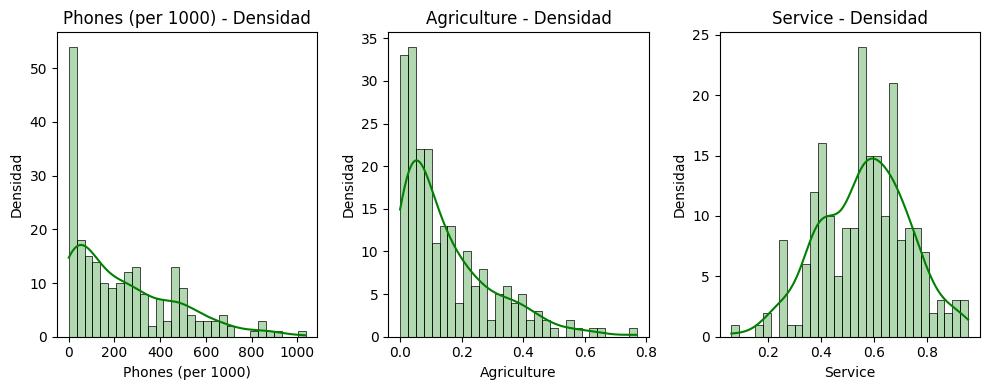

In [ ]:
variables_importantes = ["Phones (per 1000)", "Agriculture", "Service"]

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
# axes es un subplot vacío

for i, var in enumerate(variables_importantes):
    sns.histplot(data=df, x=var, kde=True, bins=30, color='green', alpha=0.3, ax=axes[i])
    #ax = axes[i] asigna al gráfico vacío el gráfico que queremos hacer.
    axes[i].set_title(f'{var} - Densidad') #pertenece a matplotlib; ayuda a cambiar el nombre a los ejes
    # no se puede usar plt.title ya que sería para el gráfico entero (acá hay subplots)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Densidad')

plt.tight_layout() #para que no se superpongan.
plt.show()





---


*Escriba* su respuesta en esta celda...


---



### Pregunta 1.8

El df contiene variables con missing values (`NaN`). Impute los `NaN` con el método que estime conveniente, justificando su decisión.

¿Es pertinente eliminar alguna de estas variables? Hágalo si es el caso.

In [ ]:
contador_missing = df.isnull().sum()
contador_missing[contador_missing > 0]

,0
Net migration,3
Infant mortality (per 1000 births),3
GDP ($ per capita),1
Literacy (%),18
Phones (per 1000),4
Arable (%),2
Crops (%),2
Other (%),2
Climate,22
Birthrate,3


In [ ]:
print(f'Porcentaje del df que perderíamos si borramos todos los missings (1): {round(100*22/len(df))}%')

Porcentaje del df que perderíamos si borramos todos los missings (1): 10%





---


*Escriba* su respuesta y **justificación** en esta celda...


---


### Pregunta 1.9

¿Cómo distribuye el `GDP ($ per capita)` en diferentes **regiones**? Defina una forma ilustrativa de gráficar el `GDP ($ per capita)` para todas las regiones en un mismo gráfico. Interprételo.

In [ ]:
# Creamos un mapa coroplético
df['iso_alpha'] = df['Country'].apply(get_iso_alpha)

fig = px.choropleth(df, locations="iso_alpha",
                    color="GDP ($ per capita)",
                    hover_name="Country",
                    color_continuous_scale="Blues")
fig.show()

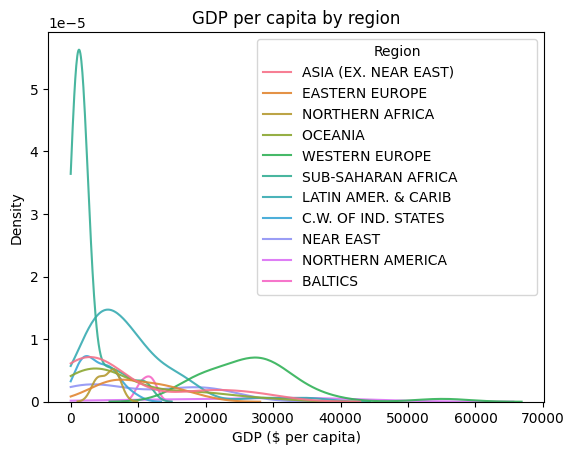

In [ ]:
sns.kdeplot(data=df, x='GDP ($ per capita)', hue='Region', fill=False, alpha=0.9, clip=(0, None))
plt.title("GDP per capita by region")
plt.xlabel("GDP ($ per capita)")
plt.ylabel("Density")
plt.show()




---


*Escriba* su interpretación en esta celda...


---


### Pregunta 1.10

Supongamos que `GDP ($ per capita)` es su variable objetivo. Estudie la correlación de esta variable con el resto de las variables del `df`. ¿Por qué es importante analizar la correlación entre las variables?



In [ ]:
correlaciones = df.corr(numeric_only=True)["GDP ($ per capita)"]
correlaciones.abs().sort_values(ascending=False)

,GDP ($ per capita)
GDP ($ per capita),1.000000
Phones (per 1000),0.834499
Birthrate,0.650137
Infant mortality (per 1000 births),0.600774
Agriculture,0.586769
Service,0.550216
Literacy (%),0.513144
Net migration,0.382461
Climate,0.340791
Crops (%),0.219229




```
# Esto tiene formato de código
```


---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.11

Realice tres _scatterplots_ (uno por variable) de las tres variables con la mayor correlación con la variable objetivo.

Utilizando los parámetros de la función con la que hizo los _scatterplots_, coloque un título a cada gráfico y agregue colores a los _data points_ del _scatterplot_- Use colores diferentes por cada gráfico.

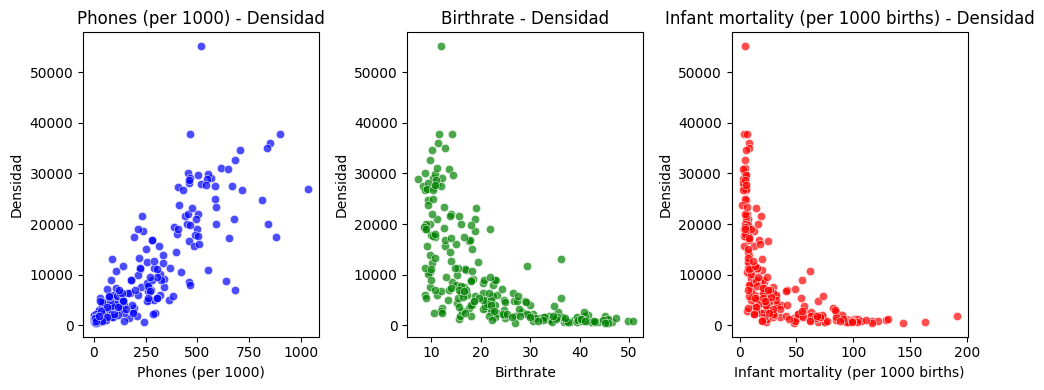

In [ ]:
variables_importantes = ["Phones (per 1000)", "Birthrate", "Infant mortality (per 1000 births)"]

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

#Agregamos los colores
colores = ["blue", "green", "red"]

#Ajustamos el loop para incluir colores.
for var, col in zip(variables_importantes, colores):
    i = variables_importantes.index(var)
    sns.scatterplot(data=df, x=var, y='GDP ($ per capita)', ax=axes[i], color = col, alpha=0.7)
    axes[i].set_title(f'{var} - Densidad')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Densidad')

plt.tight_layout()
plt.show()


### Pregunta 1.12

Cree una nueva columna `GDP (%)` que represente el GDP total de cada pais (no per capita) y agreguela al dataframe.

In [ ]:
# Creamos la variable GDP ($)

df['GDP ($)'] = df['GDP ($ per capita)'] * df['Population']

df.head(5)

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,iso_alpha,GDP ($)
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG,2.173990e+10
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB,1.611745e+10
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA,1.975805e+11
3,2007-01-01,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,ASM,4.623520e+08
4,2007-01-01,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,AND,1.352819e+09


### Pregunta 1.13

Repita el análisis de correlaciones para `GDP ($)` excluyendo `GDP ($ per capita)` del análisis. ¿Cambian las variables que más correlacionan? Justifique.

In [ ]:
correlaciones_gdp = df.drop("GDP ($ per capita)", axis=1, inplace = False).corr(numeric_only=True)["GDP ($)"]
correlaciones_gdp = correlaciones_gdp.abs().sort_values(ascending=False)

In [ ]:
corrs_gdp_PC = pd.DataFrame(correlaciones)
corrs_gdp_PC = corrs_gdp_PC.sort_values(by='GDP ($ per capita)', ascending=False)
corrs_gdp_PC.dropna(inplace=True)

corrs_gdp = pd.DataFrame(correlaciones_gdp)
corrs_gdp = corrs_gdp.sort_values(by='GDP ($)', ascending=False)
corrs_gdp.dropna(inplace=True)

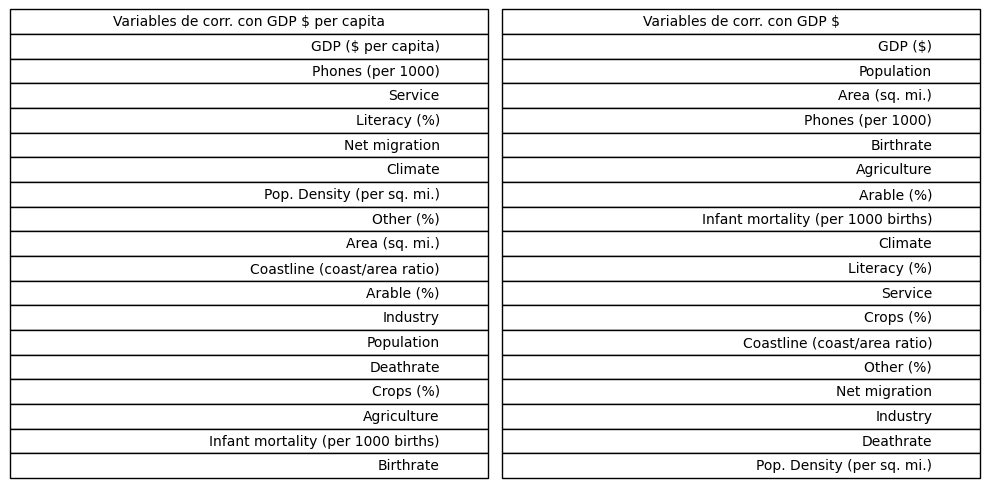

In [ ]:
# Nos interesan los nombres de los que más correlacionan, no los valores
corrs_gdp_PC_variables = corrs_gdp_PC.index.tolist()
corrs_gdp_variables = corrs_gdp.index.tolist()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))


axes[0].axis('off')  # Quitamos el axis porque estamos tabulando (no hay x e y)
table1 = axes[0].table(cellText=[[var] for var in corrs_gdp_PC_variables],
                       colLabels=['Variables de corr. con GDP $ per capita'], loc='center')
table1.scale(1, 1.5)

# Hacemos lo mismo para la otra tabla
axes[1].axis('off')
table2 = axes[1].table(cellText=[[var] for var in corrs_gdp_variables],
                       colLabels=['Variables de corr. con GDP $'], loc='center')
table2.scale(1, 1.5)

plt.tight_layout()
plt.show()




---


Respuesta: Al trabajar con PIB agregado y no per cápita dejamos de corregir el valor relativo a su población. Países más grandes exhibirán mayor PIB solo porque son más grandes (evidentemente, más personas, coincidentemente, producen más que menos personas), y esto se ve claramente al notar que `Population` es la variable de mayor correlación con el PIB.

Al correlacionar esta variable con PIB per cápita, vemos que los movimientos no están tan atados entre sí.

Del mismo modo, otras variables relacionadas meramente con el tamaño

Evidentemente, comparar PIB a secas trae una comparación más ruidosa por cuanto


---


### Pregunta 1.14

Detecte las observaciones outliers de las tres variables seleccionadas en la pregunta anterior. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

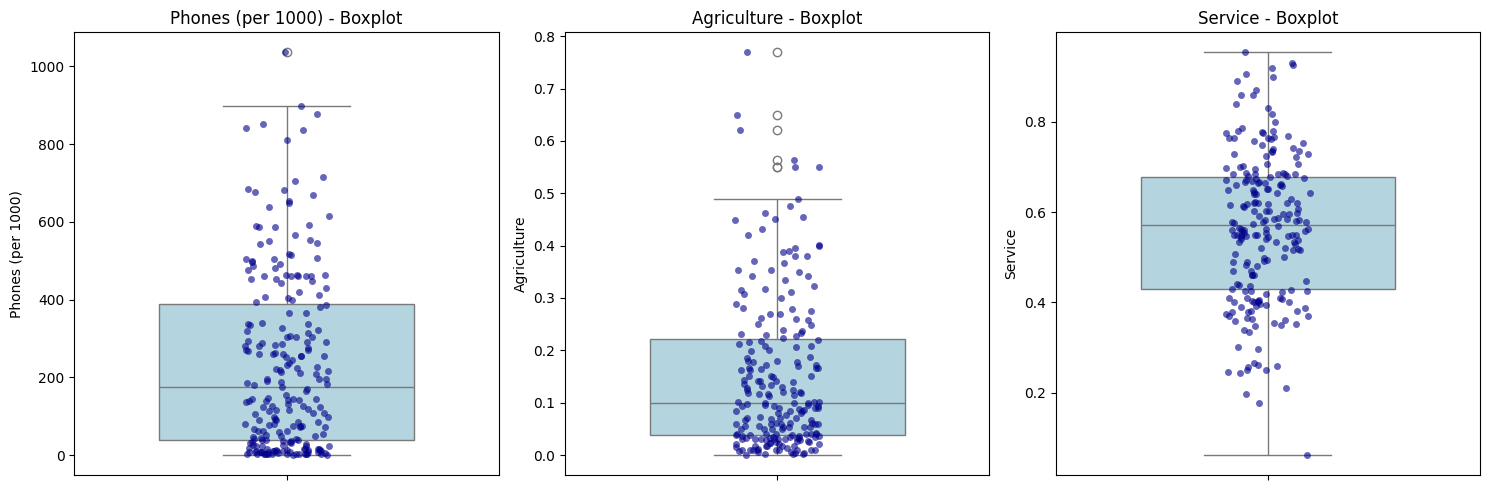

In [ ]:
variables_importantes = ["Phones (per 1000)", "Agriculture", "Service"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(variables_importantes):
    sns.boxplot(data=df, y=var, ax=axes[i], color='lightblue', width=0.6)

    # Overlay dots with stripplot for better visibility of individual points
    sns.stripplot(data=df, y=var, ax=axes[i], color='darkblue', alpha=0.6, jitter=True)

    axes[i].set_title(f'{var} - Boxplot')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()




---


*Escriba* su **justificación** en esta celda...


---



### Pregunta 1.15

En los ejemplos anteriores calculamos correlaciones para `GDP ($ per capita)` y `GDP ($)`. Genere un nuevo dataframe que tenga le variación porcentual de la correlación absoluta para cada una de las columnas de características, e.g., si la correlación en valor absoluto de `GDP ($ per capita)` vs `Industry` es 0.1 y la correlación `GDP ($)` vs `Industry` es 0.5, la variación deberá ser +500%. Dicha variación porcentual puede ser positiva o negativa, pero ordene los el dataframe de tal manera que la variación de correlación absoluta sea desendiente.

### Pregunta 1.16

Del resultado anterior, ¿qué caracerística del país tuvo una mayor diferencia absoluta el medir su correlación versus `GDP ($)` en vez de `GDP ($ per capita)`'. Interprete.




---


*Escriba* su respuesta e interpretación en esta celda...

---





## EDA con diferentes fuentes de **información**


Una situación habitual en _Data Science: es el manejo de información de múltiples fuentes para un mismo propósito. En este sentido, de ahora en adelante agregaremos un dataframe adicional a nuestro set de información, disponible en [Github](https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv). Lo llamaremos `df_gini`.

Este dataset contiene información histórica del Índice de Gini (economía), el cual captura la desigualdad económica entre los quintiles de cada país. A mayor índice Gini, más desigual es un país en términos de ingresos. Para mayor información sobre los datos, puede dirigirse al [Repositorio](https://github.com/datasets/gini-index) completo. Para conocer más sobre el índice, una navegación por [Wikipedia](https://en.wikipedia.org/wiki/Gini_coefficient) debería ser suficiente.

### Pregunta 2.0

Cargue la base datos, asegúrese de que la variable de año esté en un formato de "fecha", y usando el diccionario de mapeo por inconsistencias de nombres, `country_name_mapping`, encuentre la forma de realizar un INNER JOIN entre ambas tablas, usando el nombre del país y el año de la observación como variables por las cuales hacer el JOIN. En el diccionario `country_name_mapping`, _keys_ corresponden a los valores de la tabla `df_gini` y _values_ a los de `df`.

Llame al dataframe resultante `df_merged`.

Si usted no se ha percatado, los nombres en la columna `Country` de `df` poseen espacios al final de estos. Elimine los espacios antes de realizar el INNER JOIN de interés (Hint: existe una función propia de las variables tipo `string` que realiza la labor de eliminar espacios al final de la palabra).



In [ ]:
# URL de la base de datos
url = "https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv"

# Descargamos la base de datos usando pandas
df_gini = pd.read_csv(url)

# Mostramos la base de datos
df_gini.head(5)

,Country Name,Country Code,Year,Value
0,Albania,ALB,1996,27.0
1,Albania,ALB,2002,31.7
2,Albania,ALB,2005,30.6
3,Albania,ALB,2008,30.0
4,Albania,ALB,2012,29.0


In [ ]:
# Vemos el tipo de datos de las variables

df_gini.dtypes

,0
Country Name,object
Country Code,object
Year,int64
Value,float64


In [ ]:
# Cambiamos a formato fecha

df_gini['date'] = pd.to_datetime(df_gini['Year'], format='%Y')

# Comprobamos que se haya transformado

df_gini.dtypes

,0
Country Name,object
Country Code,object
Year,int64
Value,float64
date,datetime64[ns]


In [ ]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping = {
    "Bahamas": "Bahamas, The",
    "Bosnia and Herzegovina": "Bosnia & Herzegovina",
    "Myanmar": "Burma",
    "Cape Verde": "Cabo Verde",
    "Central African Republic": "Central African Rep.",
    "Congo, Rep.": "Congo, Repub. of the",
    "Czechia": "Czech Republic",
    "Timor-Leste": "East Timor",
    "Egypt, Arab Rep.": "Egypt",
    "West Bank and Gaza": "Gaza Strip",
    "Iran, Islamic Rep.": "Iran",
    "Korea, Dem. People's Rep.": "Korea, North",
    "Korea, Rep.": "Korea, South",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Laos",
    "North Macedonia": "Macedonia",
    "Micronesia, Fed. Sts.": "Micronesia, Fed. St.",
    "Russian Federation": "Russia",
    "St. Kitts and Nevis": "Saint Kitts & Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Slovak Republic": "Slovakia",
    "Eswatini": "Swaziland",
    "Syrian Arab Republic": "Syria",
    "Trinidad and Tobago": "Trinidad & Tobago",
    "Turkiye": "Turkey",
    "Venezuela, RB": "Venezuela",
    "Viet Nam": "Vietnam",
    "Yemen, Rep.": "Yemen"
}



In [ ]:
# Eliminamos los espacios al final del nombre de cada país

df['Country'] = df['Country'].str.rstrip()

# Reemplazamos el los países en ambas base de datos según el listado para homogeneizar las bases

df['Country'] = df['Country'].replace(country_name_mapping)
df_gini['Country'] = df_gini['Country Name'].replace(country_name_mapping)

# Dejamos solo el año en la base original

df['date'] = df['date'].dt.year

# Renombramos al variable date a Year en la base original

df = df.rename(columns={'date': 'Year'})

In [ ]:
# Realizamos el merge de las bases de datos

df_merged = pd.merge(df, df_gini, on=['Country', 'Year'], how='inner')

In [ ]:
# Vemos la nueva base

df_merged.head(10)

,Year,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Deathrate,Agriculture,Industry,Service,iso_alpha,GDP ($),Country Name,Country Code,Value,date
0,2007,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,...,7.55,0.095,0.358,0.547,ARG,4.471245e+11,Argentina,ARG,46.3,2007-01-01
1,2007,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,...,8.23,0.239,0.343,0.418,ARM,1.041730e+10,Armenia,ARM,31.2,2007-01-01
2,2007,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,...,9.76,0.018,0.304,0.678,AUT,2.457864e+11,Austria,AUT,30.6,2007-01-01
3,2007,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,...,14.02,0.093,0.316,0.591,BLR,6.278737e+10,Belarus,BLR,29.6,2007-01-01
4,2007,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,...,10.27,0.010,0.240,0.749,BEL,3.020308e+11,Belgium,BEL,29.2,2007-01-01
5,2007,Bhutan,ASIA (EX. NEAR EAST),2279723,47000,48.5,0.00,0.00,100.44,1300.0,...,12.70,0.258,0.379,0.363,BTN,2.963640e+09,Bhutan,BTN,38.1,2007-01-01
6,2007,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,...,7.53,0.128,0.352,0.520,BOL,2.157371e+10,Bolivia,BOL,54.5,2007-01-01
7,2007,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,...,8.27,0.142,0.308,0.550,None,2.744375e+10,Bosnia and Herzegovina,BIH,33.1,2007-01-01
8,2007,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,...,6.17,0.084,0.400,0.516,BRA,1.429395e+12,Brazil,BRA,54.9,2007-01-01
9,2007,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,...,14.27,0.093,0.304,0.603,BGR,5.612879e+10,Bulgaria,BGR,36.1,2007-01-01


In [ ]:
# Renombramos al variable Value a GINI

df_merged = df_merged.rename(columns={'Value': 'GINI'})

### Pregunta 2.1

Repita el ejercicio de la obtención de un ranking para las correlaciones absolutas, tal como lo hizo para el GDP per cápita. ¿Cuáles son las relaciones que más le sorprenden? ¿Cuáles son las que están en línea con lo que esperaba? Justifique para ambos casos.





In [ ]:
# Realizamos las correlaciones absolutas

correlaciones_2 = df_merged.corr(numeric_only=True)["GDP ($ per capita)"]
correlaciones_2.abs().sort_values(ascending=False)

,GDP ($ per capita)
GDP ($ per capita),1.000000
Phones (per 1000),0.873541
Net migration,0.691610
Service,0.643881
Infant mortality (per 1000 births),0.626639
Birthrate,0.588530
Agriculture,0.585734
Climate,0.481126
Literacy (%),0.464566
GINI,0.410041




---

Se puede observar que las variables que tienen una mayor correlación, en términos absolutos, pasan a ser las variables Net migration con un 0,6 y Service 0,6. Si bien ambas variables sorprenden al pasar a tener una correlación fuerte (pues se espera que se mantengan las correlaciones encontradas en el ejercicio 1), la intuición de lo anterior es que las variables incorporadas pueden generar un cambio en la población o la muestra y una posible relación de las variables preexistentes con las variables agregadas.

---





Finalmente, agregaremos una tercera base de datos al análisis, también disponible en [Github](https://raw.githubusercontent.com/datasets/co2-fossil-by-nation/refs/heads/main/data/fossil-fuel-co2-emissions-by-nation.csv) con su repectivo
[Repositorio](https://github.com/datasets/co2-fossil-by-nation). Esta contiene emisiones de dióxido de carbono (CO2) total y por fuentes, desagregado por país. La base de datos contiene datos desde el siglo XVI y la frecuencia es anual.



### Pregunta 2.2

Cargue la base de datos llamándola `df_co2`. Asegúrese de que todas las variables estén en su correcto formato (años deben estar en un formato de fecha). ¿Qué cuidados identifica usted que debiésemos tener al momento de observar valores nulos en esta base de datos?

Adicionalmente, para cada palabra en la columna `Country`, asegúrese de que la primera letra siempre sea mayúscula y que el resto de letras sean minúsculas (Hint: revise `methods` propios de las variables tipo `string`).

Luego, reemplace valores en `df_co2["Country"]` según el mapping otorgado. En el diccionario `country_name_mapping_co2`, _keys_ corresponden a los valores de la tabla `df_co2` y _values_ a los de `df`.




In [ ]:
# URL de la base de datos
url = "https://raw.githubusercontent.com/datasets/co2-fossil-by-nation/refs/heads/main/data/fossil-fuel-co2-emissions-by-nation.csv"

# Descargar la base de datos usando pandas
df_co2 = pd.read_csv(url)

# Observamos la composición de la base

df_co2.head(5)

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552.0,0.0,0.0,0.0,NaN,NaN,0.0
1,1752,UNITED KINGDOM,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
2,1753,UNITED KINGDOM,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
3,1754,UNITED KINGDOM,2554,2554.0,0.0,0.0,0.0,NaN,NaN,0.0
4,1755,UNITED KINGDOM,2555,2555.0,0.0,0.0,0.0,NaN,NaN,0.0


In [ ]:
# Pasamos a formato fecha

df_co2['Year'] = pd.to_datetime(df_co2['Year'], format='%Y')
df_merged['Year'] = pd.to_datetime(df_merged['Year'], format='%Y')

# Cambiamos a formato oración

df_co2['Country'] = df_co2['Country'].str.title()

# Comprobamos que se haya transformado

df_co2.dtypes

,0
Year,datetime64[ns]
Country,object
Total,int64
Solid Fuel,float64
Liquid Fuel,float64
Gas Fuel,float64
Cement,float64
Gas Flaring,float64
Per Capita,float64
Bunker fuels (Not in Total),float64


In [ ]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping_co2 = {
    "United States Of America": "United States",
    "France (Including Monaco)": "France",
    "Italy (Including San Marino)": "Italy",
    "Plurinational State Of Bolivia": "Bolivia",
    "Federal Republic Of Germany": "Germany",
    "Former German Democratic Republic": "Germany",
    "Republic Of Moldova": "Moldova",
    "United Republic Of Tanzania": "Tanzania",
    "Japan (Excluding The Ruyuku Islands)": "Japan",
    "Hong Kong Special Adminstrative Region Of China": "Hong Kong",
    "Peninsular Malaysia": "Malaysia",
    "Democratic Republic Of The Congo (Formerly Zaire)": "Congo, Dem. Rep.",
    "Brunei (Darussalam)": "Brunei",
    "Myanmar (Formerly Burma)": "Burma",
    "Syrian Arab Republic": "Syria",
    "Islamic Republic Of Iran": "Iran",
    "Republic Of Korea": "Korea, South",
    "Democratic People S Republic Of Korea": "Korea, North",
    "Russian Federation": "Russia",
    "Viet Nam": "Vietnam",
    "Yemen": "Yemen, Rep.",
    "Trinidad And Tobago": "Trinidad & Tobago",
    "Bahamas": "Bahamas, The",
    "Micronesia": "Micronesia, Fed. St.",
    "Slovakia": "Slovakia",
    "St. Vincent & The Grenadines": "Saint Vincent and the Grenadines",
    "Saint Lucia": "Saint Lucia",
    "Antigua & Barbuda": "Antigua & Barbuda",
    "Saint Kitts-Nevis-Anguilla": "Saint Kitts & Nevis",
    "Netherland Antilles And Aruba": "Netherlands Antilles",
    "Timor-Leste (Formerly East Timor)": "East Timor",
    "Macau Special Adminstrative Region Of China": "Macau",
    "Republic Of Cameroon": "Cameroon",
    "Republic Of Sudan": "Sudan",
    "Lao People S Democratic Republic": "Laos",
    "Libyan Arab Jamahiriyah": "Libya",
    "Cote D Ivoire": "Cote d'Ivoire",
    "British Virgin Islands": "British Virgin Is.",
    "Faeroe Islands": "Faroe Islands",
    "China (Mainland)": "China",
}


In [ ]:
# Ajustamos y estandarizamos los nombres de los países

df_co2['Country'] = df_co2['Country'].replace(country_name_mapping_co2)

# Vemos la base de datos

df_co2.head(5)

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751-01-01,United Kingdom,2552,2552.0,0.0,0.0,0.0,NaN,NaN,0.0
1,1752-01-01,United Kingdom,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
2,1753-01-01,United Kingdom,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
3,1754-01-01,United Kingdom,2554,2554.0,0.0,0.0,0.0,NaN,NaN,0.0
4,1755-01-01,United Kingdom,2555,2555.0,0.0,0.0,0.0,NaN,NaN,0.0


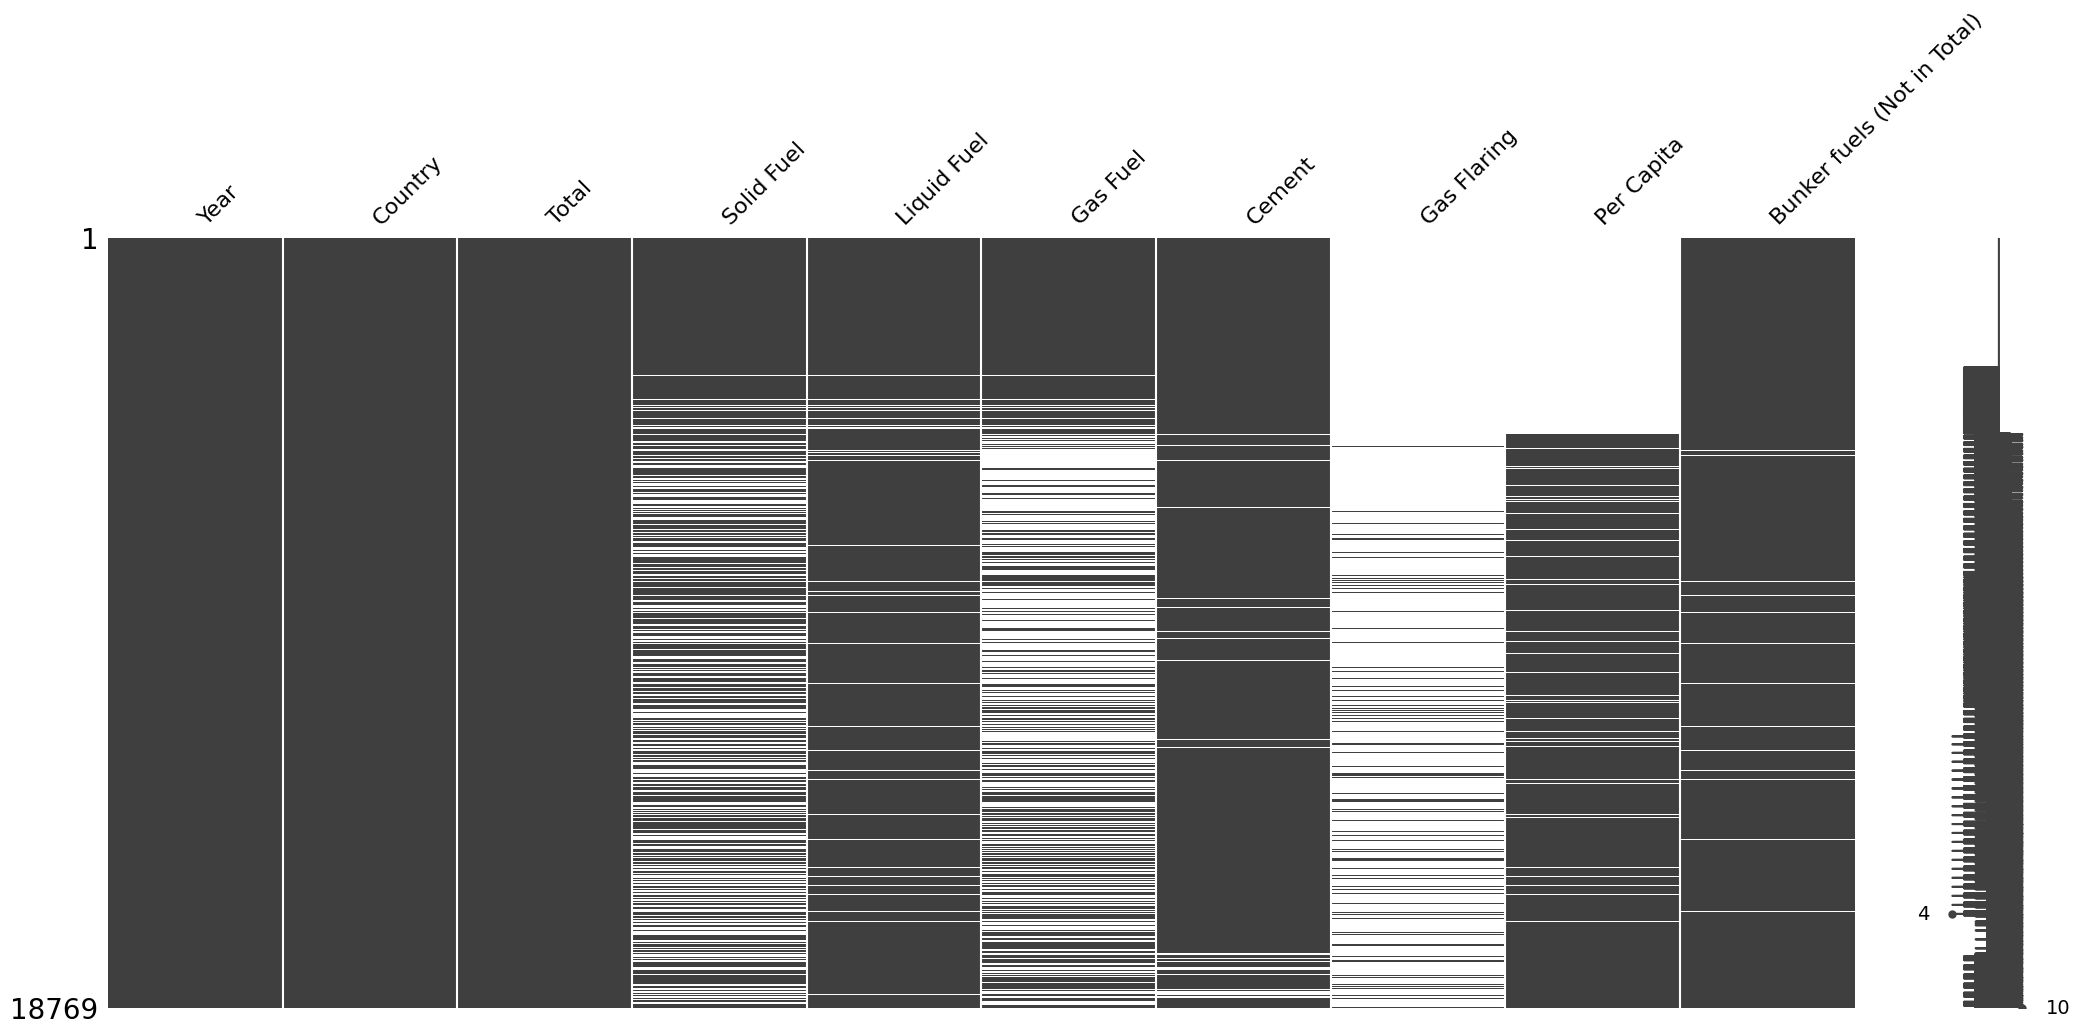

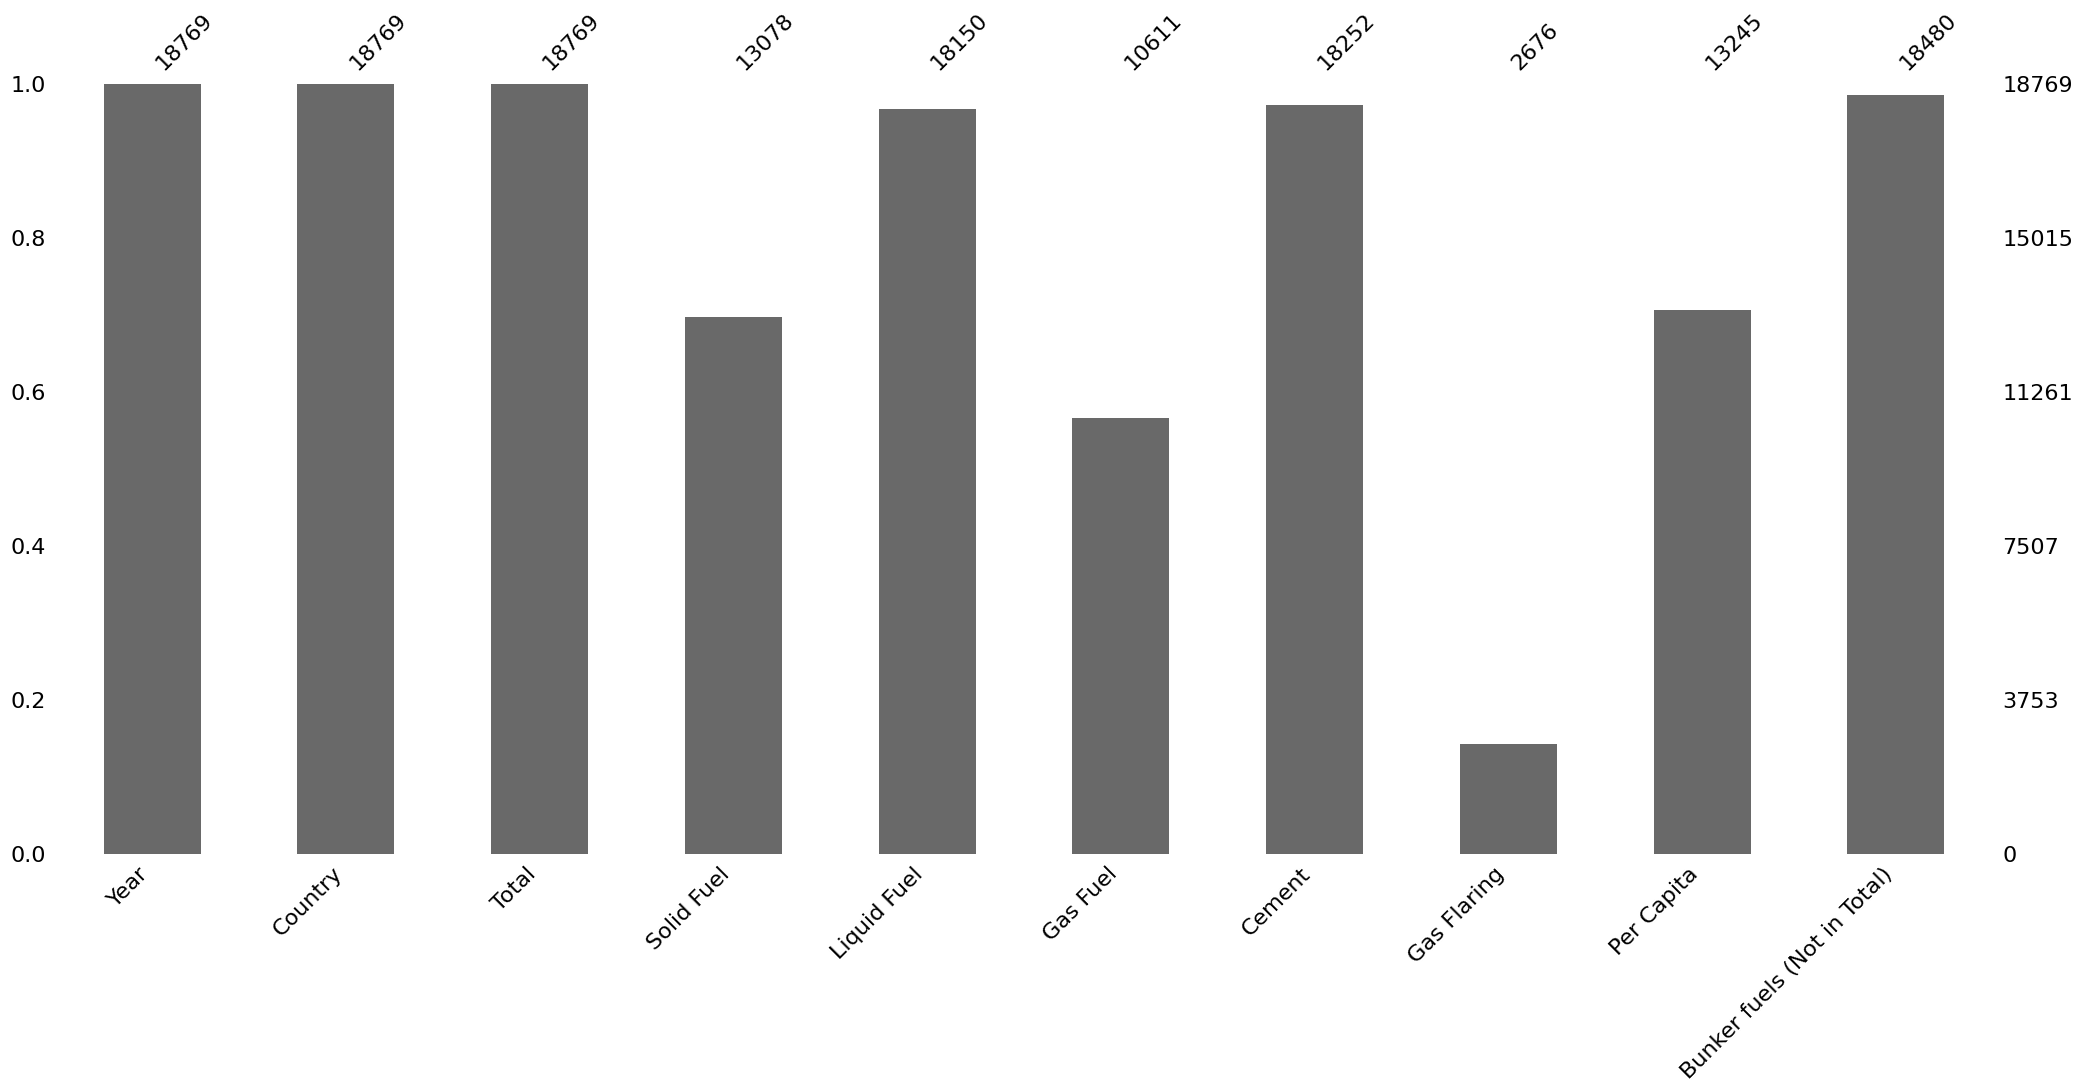

In [ ]:
# Vemos la cantidad de missing values por variables

# Matrix de missing
msno.matrix(df_co2)
plt.show()

# Gráfico de barra de missing
msno.bar(df_co2)
plt.show()



---

Se deberá tener en consideraciones las variables que presenten mayor cantidad de missing values con respecto al tamaño total de la muestra (Gas Flaring y Gas Fuel; ambas tienen menos del 50% de datos disponibles), puesto que el análisis sobre estas variables puede resultar ser sesgados y no concluyentes. Del mismo modo, puede sugerir un error de medición sobre la variable Total y por ende que la los valores sean subrepresentativos de la realidad.

---



### Pregunta 2.3

En un mismo gráfico, grafique las series de emisiones totales de CO2 para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Brasil
- China
- Japón
- India


Para cada serie, añada una leyenda con el nombre del país.


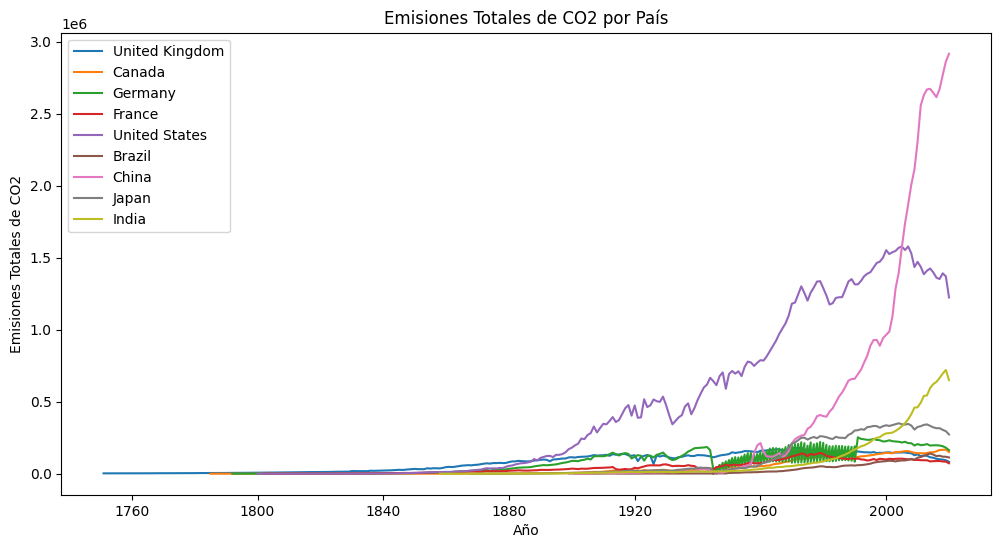

In [ ]:
# Se definen los países solicitados
paises = ["United Kingdom", "Canada", "Germany", "France", "United States", "Brazil", "China", "Japan", "India"]

# Filtra los datos para los países solicitados y acotamos la base de dato con los datos solicitado
datos_filtrados = df_co2[df_co2['Country'].isin(paises)][['Country', 'Year', 'Total']]

# Definimos le tamaño del gráfico
plt.figure(figsize=(12, 6))

# Realizamos el gráfico para los países seleccionados
for pais in paises:
    datos_pais = datos_filtrados[datos_filtrados['Country'] == pais]
    plt.plot(datos_pais['Year'], datos_pais['Total'], label=pais)

# Agregamos etiquetas y título
plt.xlabel("Año")
plt.ylabel("Emisiones Totales de CO2")
plt.title("Emisiones Totales de CO2 por País")

# Agregamos leyenda
plt.legend()

# Muestramos el gráfico
plt.show()

### Pregunta 2.4

Para el año 2007, por cada país realice un ranking de las fuentes con más emisiones de CO2 excluyendo las variables `Per Capita` y `Bunker fuels (Not in Total)`. Es decir, asigne un número de 1 a 5 a $\{$ `Solid Fuel`, `Liquid Fuel`, `Gas Fuel`, `Cement`, `Gas Flaring` $\}$, donde 1 es la mayor fuente de emisión de ese país en aquel año, y 5 indica que fue la menor; así para todos los países.

Si en 2007 no se reporta una fuente de emisión para un país, por ejemplo, si emisiones de `Gas Flaring` no se reportara, entonces asigne números de 1 a 4 a las fuentes restantes. Análogo para un menor número de datos.

Luego, por cada variable grafique un histograma de frecuencias del ranking que obtuvo la fuente emisión a lo largo de todos los países.

¿Cuál fue la fuente más contaminante en la mayoría de países en 2007?


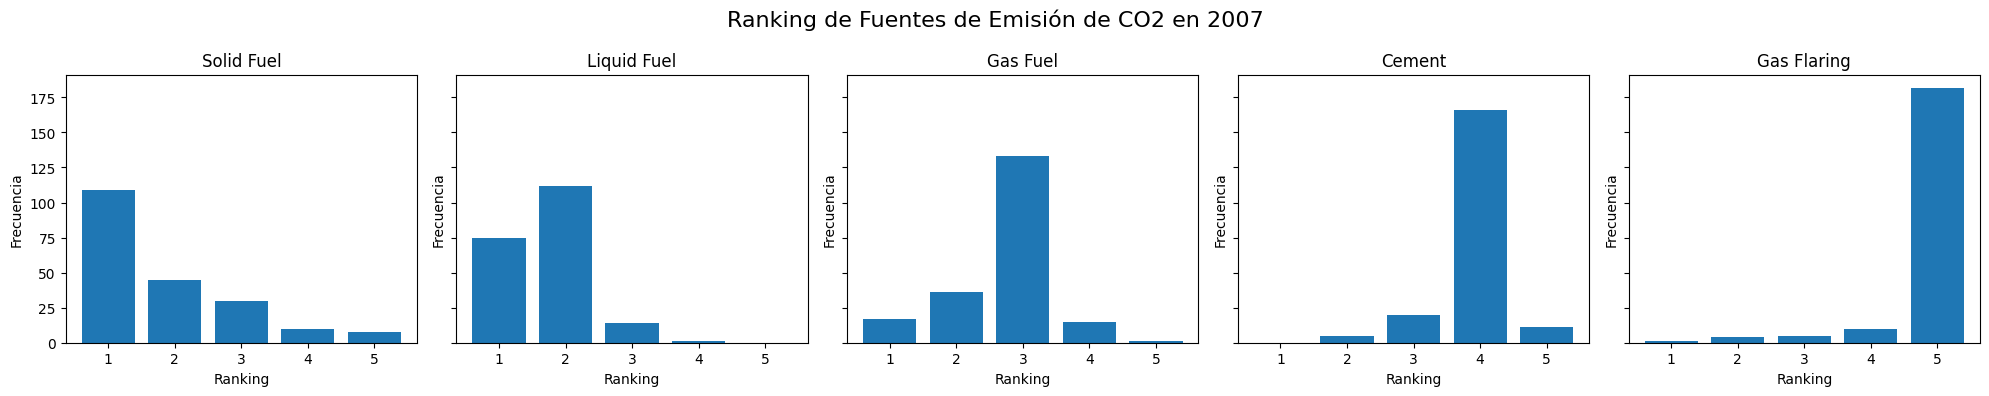

In [ ]:
# Dejamos solo el año en la base CO2

df_co2['Year'] = df_co2['Year'].dt.year

# Seleccionamos datos para el año 2007 y las columnas de interés
emisiones_2007 = df_co2[(df_co2['Year'] == 2007) & (df_co2['Country'].isin(df['Country']))][
    ['Country', 'Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring']
]


# Definimos una función para asignar ranking a las fuentes de emisión
def ranking_emisiones(fila):
    fuentes = ['Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring']
    emisiones = fila[fuentes].values  # Obtener valores de las columnas

    # Ordenamos las emisiones de mayor a menor y obtenemos sus índices
    indices_ordenados = (-emisiones).argsort()

    # Definimos formalmente la función
    ranking = {fuentes[i]: ranking + 1 for ranking, i in enumerate(indices_ordenados)}
    return pd.Series(ranking)

# Aplicamos la función ranking_emisiones a cada fila del DataFrame
ranking_df = emisiones_2007.apply(ranking_emisiones, axis=1)

# Unimos el ranking al DataFrame original
emisiones_2007 = emisiones_2007.join(ranking_df, lsuffix='_original', rsuffix='_ranking')

# Graficamos los histogramas de frecuencias para cada tipo de emisión
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
fuentes = ['Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring']

for i, fuente in enumerate(fuentes):
    axes[i].hist(emisiones_2007[fuente + '_ranking'], bins=range(1, 7), align='left', rwidth=0.8)
    axes[i].set_title(fuente)
    axes[i].set_xlabel('Ranking')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xticks(range(1, 6))

plt.suptitle('Ranking de Fuentes de Emisión de CO2 en 2007', fontsize=16)
plt.tight_layout()
plt.show()



---


De acuerdo a los histogramas presentados, el combustible solido representó la mayor cantidad de emisiones en todos los países (más de 100) encontrados para el 2007.

---





### Pregunta 2.5

Para cada serie de total de emisiones por país, calcule el cambio porcentual a través del tiempo. Realice imputación de missings si considera necesario, justificando su imputación. Si no lo considera necesario, también justifique (se evaluará un buen criterio fundamentado).

Repita el ejercicio del gráfico de series de tiempo anterior, pero graficando los **cambios porcentuales** para años mayores o iguales a 1995. ¿Cómo interpretaría económicamente el shock sobre las emisiones de CO2 tanto en la crisis subprime como en la crisis del Covid-19?


In [ ]:
# Agrupamos por país y ordenamos por año
df_co2_filtrado = df_co2.sort_values(by=['Country', 'Year'])

# Se realiza un cambio porcentual de total de las emisiones de CO2

df_co2['CO2_delta'] = df_co2_filtrado.groupby('Country')['Total'].pct_change() * 100

# Se filtra la base datos después de 1995
post_1995 = df_co2[df_co2['Year'] >= 1995]

# Vemos el nuevo dataframe

post_1995.head(10)

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),CO2_delta
13073,1995,Afghanistan,389,4.0,276.0,88.0,15.0,6.0,0.024198,4.0,-2.506266
13074,1995,Albania,564,44.0,484.0,14.0,22.0,NaN,0.171424,0.0,8.045977
13075,1995,Algeria,25815,528.0,7391.0,12888.0,756.0,4252.0,0.914767,534.0,10.259258
13076,1995,Andorra,116,0.0,116.0,NaN,0.0,NaN,1.864068,0.0,4.504505
13077,1995,Angola,1516,NaN,822.0,286.0,25.0,383.0,0.110835,324.0,-8.121212
13078,1995,Anguilla,16,NaN,16.0,NaN,0.0,NaN,1.679450,7.0,6.666667
13079,1995,Antarctic Fisheries,1,NaN,1.0,NaN,0.0,NaN,NaN,61.0,-75.000000
13080,1995,Antigua & Barbuda,74,NaN,74.0,NaN,0.0,NaN,1.088141,59.0,1.369863
13081,1995,Argentina,34737,1010.0,17149.0,14518.0,582.0,1477.0,1.000457,410.0,4.629518
13082,1995,Armenia,926,2.0,183.0,714.0,27.0,NaN,0.277742,29.0,25.815217


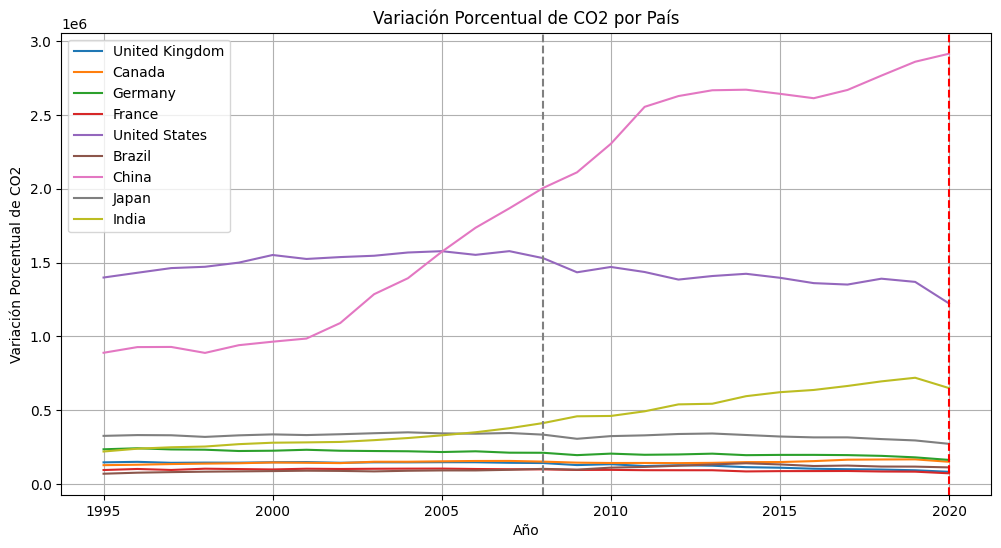

In [ ]:
# Creamos la gráfica
plt.figure(figsize=(12, 6))

for pais in paises:
    datos_1995 = post_1995[post_1995['Country'] == pais]
    plt.plot(datos_1995['Year'], datos_1995['Total'], label=pais)

# Agregamos etiquetas y título
plt.xlabel("Año")
plt.ylabel("Variación Porcentual de CO2")
plt.title("Variación Porcentual de CO2 por País")

# Agregamos leyenda y que sea cuadrículado
plt.legend()
plt.grid(True)

# Incorporamos líneas verticales punteadas en 2008 and 2020
plt.axvline(x=2008, color='gray', linestyle='--', label='Crisis Subprime')
plt.axvline(x=2020, color='red', linestyle='--', label='Crisis Covid-19')

# Mostramos el gráfico
plt.show()


---


Como se oberva en el gráfico la recta vertical gris corresponde al año de la crisis sub-prime (2008). Mientras que la recta vertical roja señala la crisis covid-19.

Se puede vislumbre que la crisis subprime ha tenido un efecto heterogeneo en la tasa de crecimiento de CO2, se evidencia puede plantear que los países que han sido mayormente afectados por la crisis disminuyeron su crecimiento de CO2 (Estados Unidos). Sin embargo, países como China e India han incrementado su variación de CO2.

Respecto a la crisis Covid-19, no se puede realizar un análisis debido al límite temporal de la muestra.



---





### Pregunta 2.6

Calcule el promedio a lo largo de toda la muestra ($\mathbb{E}[\cdot]$) para el cambio porcentual de cada país y genere una nueva serie con la resta entre el cambio porcentual del país $i$ en el año $t$, y el promedio del cambio porcentual del país $i$. En otras palabras, genere una serie con _**desvíos del cambio porcentual promedio**_ $\forall i,t$:

$$Nueva Serie_i = \Delta \% TotalCO2_{i,t} - \mathbb{E}[{\Delta \% TotalCO2_{i,t}}]$$

Luego, para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Japón
- Italia
- España


grafique en un panel _1x2_ la desviación del cambio porcentual respecto al promedio entre 2007 y 2010 en lado izquierdo, y entre 2017 y 2020 en el lado derecho (Hint: Hay comandos que facilitan esta labor. Puede intentar con `fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)`, por ejemplo).

¿Existe algún país en particular que mostró mayores desviaciones atípicas de emisión de CO2 durante el periodo de la crisis sub-prime? ¿Cómo es el comportamiento de las desviaciones atípicas de CO2 de este país durante la crisis del Covid-19?


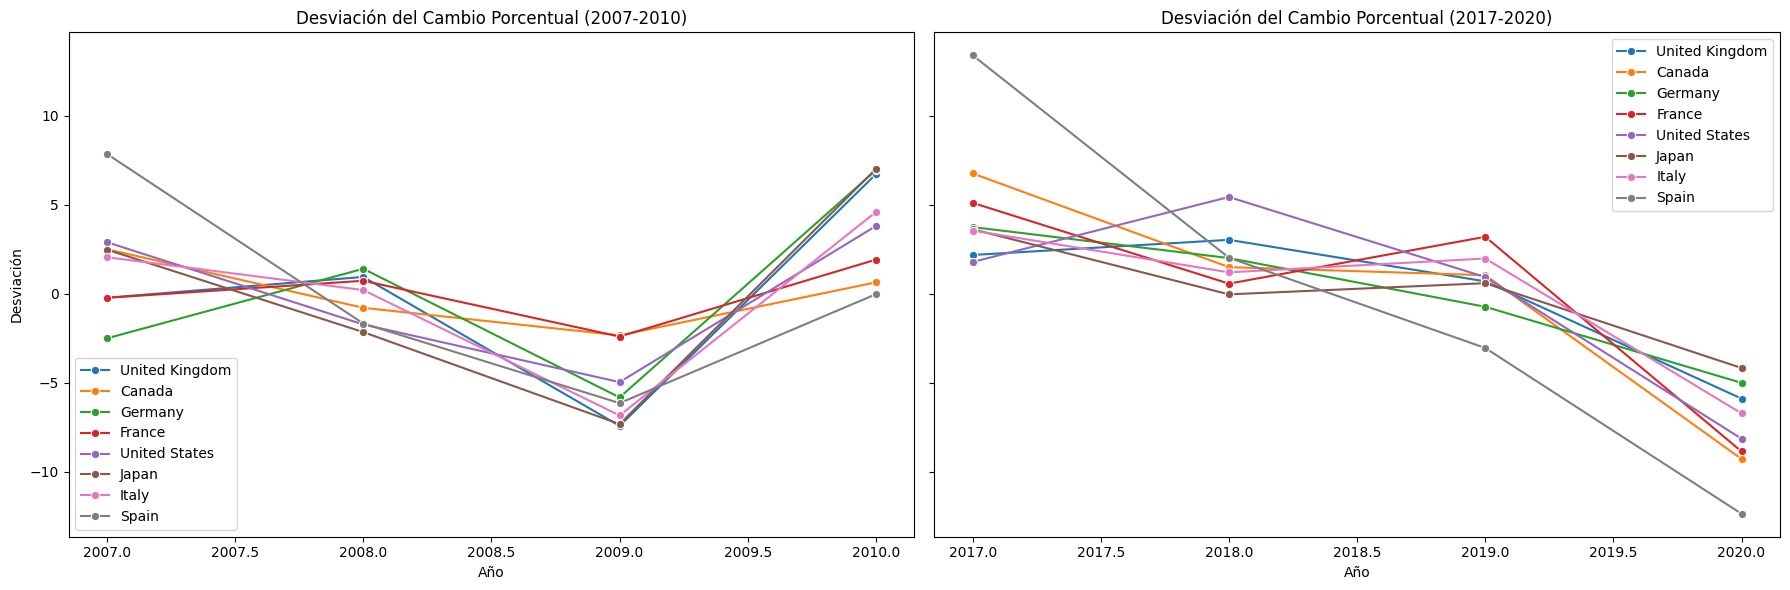

In [ ]:
# Filtramos los intervalos de tiempo
df_intervalo_1 = df_co2[(df_co2['Year'] >= 2007) & (df_co2['Year'] <= 2010)].copy()
df_intervalo_2 = df_co2[(df_co2['Year'] >= 2017) & (df_co2['Year'] <= 2020)].copy()

# Calculamos la media para cada país
media_1 = df_intervalo_1.groupby('Country')['CO2_delta'].transform('mean')
media_2 = df_intervalo_2.groupby('Country')['CO2_delta'].transform('mean')

# Calculamos las desviaciones
df_intervalo_1['Desviacion'] = df_intervalo_1['CO2_delta'] - media_1
df_intervalo_2['Desviacion'] = df_intervalo_2['CO2_delta'] - media_2

# Define los países de interés (paises_2)
paises_2 = ["United Kingdom", "Canada", "Germany", "France", "United States", "Japan", "Italy", "Spain"]


# Crea la figura de panel 1x2
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

for pais in paises_2:
    # Filtra los datos para el país actual e intervalos de tiempo
    df_pais_1 = df_intervalo_1[(df_intervalo_1['Country'] == pais)]
    df_pais_2 = df_intervalo_2[(df_intervalo_2['Country'] == pais)]

    # Primer gráfico (2007-2010)
    sns.lineplot(x='Year', y='Desviacion', data=df_pais_1, ax=axes[0], marker='o', label=pais)

    # Segundo gráfico (2017-2020)
    sns.lineplot(x='Year', y='Desviacion', data=df_pais_2, ax=axes[1], marker='o', label=pais)


# Títulos y etiquetas
axes[0].set_title('Desviación del Cambio Porcentual (2007-2010)')
axes[1].set_title('Desviación del Cambio Porcentual (2017-2020)')
axes[0].set_ylabel('Desviación')
axes[0].set_xlabel('Año')
axes[1].set_xlabel('Año')

# Agregamos las leyendas
axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

---

Posterior a la crisis subprime se evidencia que la mayoría de los países presentan una menor desviación del cambio porcentual. Mientras que Canadá y Francia no presentan una disminución abrupta de esta.

En tanto al comportamiento de la desviación durante la crisis del covid-19, tiende a disminuir fuertemente en todos los países de la muestra seleccionada.

---





### Pregunta 2.7

Genere un nuevo dataframe llamado `df_final`. Para esto, realice un INNER JOIN entre el dataframe `df_co2` y `df_merged` por "año y país" (debería terminar sólo con valores de 2007 si usted realiza un INNER JOIN).

Finalmente, grafique un mapa de calor de correlaciones (_heatmapt_) entre las variables numéricas ,excluyendo fechas.

¿Qué variables económicas, demográficas y de desarrollo humano muestran relación más importante con las emisiones de CO2? Interprete estas relaciones.


In [ ]:
# Unimos las dos bases de datos

# Dejamos solo el año en la base df_merged

df_merged['Year'] = df_merged['Year'].dt.year

# Realizamos el merge de las bases de datos

df_merged_2 = pd.merge(df_merged, df_co2, on=['Country', 'Year'], how='inner')

# Visualizamos

df_merged_2.head(100)

,Year,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,date,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),CO2_delta
0,2007,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,...,2007-01-01,47441,999.0,21275.0,23793.0,976.0,398.0,1.195584,1245.0,-0.208246
1,2007,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,...,2007-01-01,1364,2.0,252.0,1026.0,83.0,NaN,0.452310,50.0,15.495343
2,2007,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,...,2007-01-01,18779,4017.0,9741.0,4455.0,567.0,NaN,2.267470,609.0,-3.948647
3,2007,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,...,2007-01-01,16504,602.0,4641.0,10819.0,442.0,NaN,1.676069,0.0,-2.631268
4,2007,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,...,2007-01-01,27780,4376.0,13234.0,9355.0,814.0,NaN,2.616368,9329.0,-3.855472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2007,Thailand,ASIA (EX. NEAR EAST),64631595,514000,125.7,0.63,0.00,20.48,7400.0,...,2007-01-01,62753,14085.0,28747.0,15768.0,4153.0,NaN,0.942635,2739.0,1.410795
62,2007,Ukraine,C.W. OF IND. STATES,46710816,603700,77.4,0.46,-0.39,20.34,5400.0,...,2007-01-01,87237,40029.0,11293.0,34246.0,1669.0,NaN,1.878084,298.0,-1.587248
63,2007,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,...,2007-01-01,143938,40073.0,50319.0,51193.0,1452.0,902.0,2.355577,12134.0,-2.432775
64,2007,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,...,2007-01-01,1577931,575692.0,648278.0,339433.0,12420.0,2109.0,5.167634,45630.0,1.612215


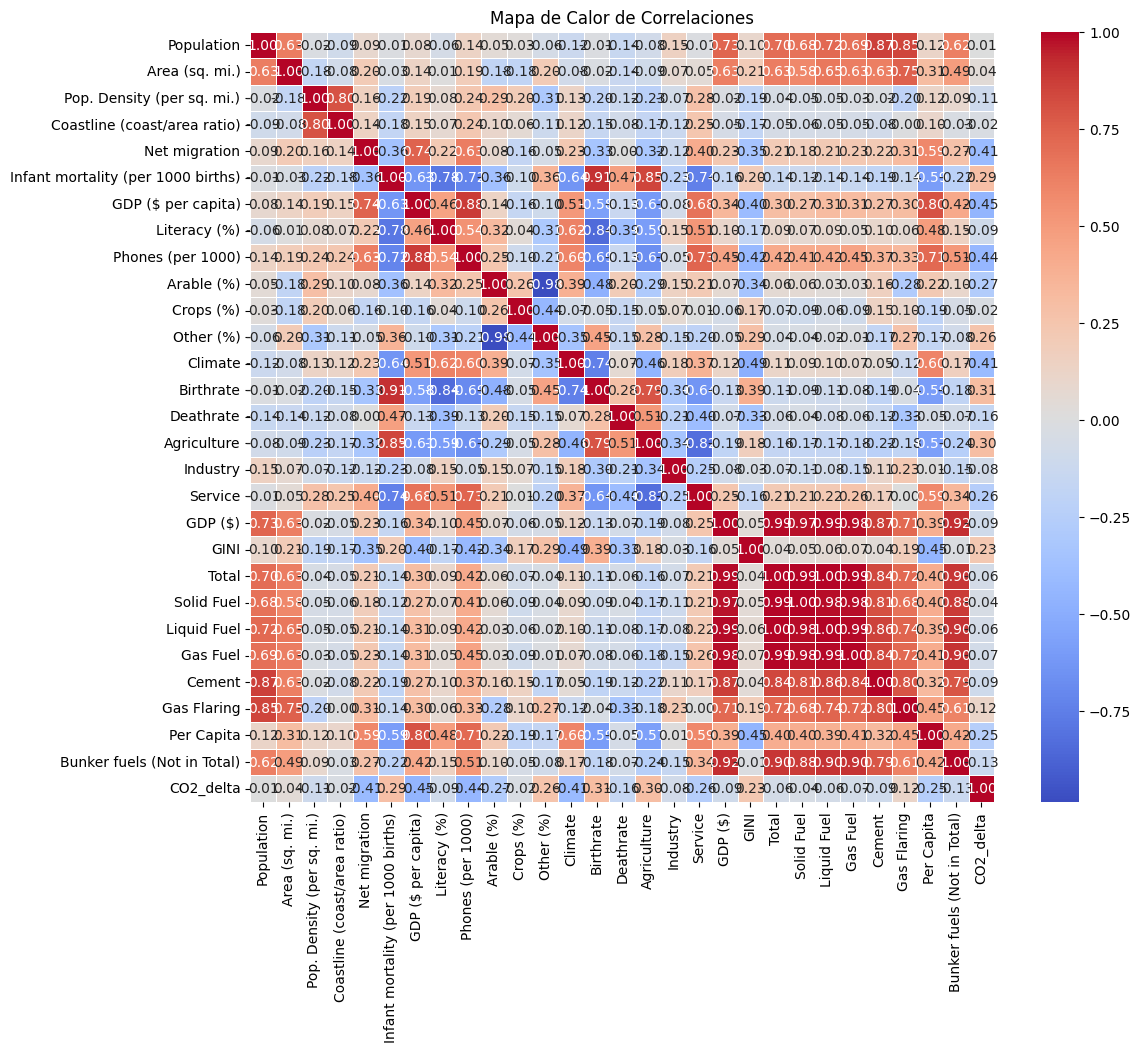

In [ ]:
# Seleccionamos las columnas numéricas, excluyendo las fechas
columnas_numericas = df_merged_2.select_dtypes(include=['number']).columns
columnas_numericas = columnas_numericas[columnas_numericas != 'Year']  # Excluye la columna 'Year' si es numérica

# Calcula la matriz de correlación
matriz_correlacion = df_merged_2[columnas_numericas].corr()

# Crea el heatmap
plt.figure(figsize=(12, 10))  # Ajusta el tamaño de la figura según sea necesario
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

Se evidencia que las variables que mayor correlación poseen son:


*   GDP ($): Con un 0,99
*   Population: Con un 0,7
*   Area (sq. mil): Con un 0,63

Respecto al producto interno bruto, posee una correlación positiva, puesto que se espera que para lograr un mayor nivel de producto se deben incorporar más insumos o factores productivos que tienen como externalidad mayor contaminación de CO2.

En términos del nivel de población, un mayor tamaño demografico implica un mayor consumo y uso de factores contaminantes (huella de carbono). Es por esto que la población posee una relación positiva respecto a la contaminanción.

Por último, una mayor área geográfica puede suponer un mayor nivel de población y por lo tanto una mayor cantidad de contaminación.

---
